## Exploratory Data Analysis for Siftwell Coding Challenge

This notebook is prepared as part of the interview process for Siftwell. The goal is to conduct a thorough exploratory analysis of the provided datasets, which will be used to build a regression model for predicting future costs and a binary classification model to determine the likelihood of individuals receiving mental health treatment.

The EDA will cover initial data inspection, cleaning, and visualization to uncover insights that will guide the subsequent modeling phase.


### Data Loading and Initial Inspection

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring settings for better display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option('display.max_rows', 100)
sns.set_theme(style="whitegrid") # Styling for seaborn plots

# Load the datasets
train_df = pd.read_csv('../data/raw/coding_challenge_train.csv')
test_df = pd.read_csv('../data/raw/coding_challenge_test_without_labels.csv')

# Compute the correlation matrix
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()

# Filter features based on a correlation threshold
correlation_threshold = 0.50
corr_features = corr_matrix['total_cost_future'].abs()
highly_corr_features = corr_matrix[corr_features > correlation_threshold]['total_cost_future']

# Sort the features based on their correlation with 'total_cost_future'
sorted_corr = corr_features.sort_values(ascending=False).drop('total_cost_future')
sorted_highly_corr = highly_corr_features.sort_values(ascending=False).drop('total_cost_future')

# Confirm the datasets are loaded as expected
print("Training Data - First 5 Rows:")
print(train_df.head())
print("\nTest Data - First 5 Rows:")
print(test_df.head())


Training Data - First 5 Rows:
   prediction_date cnYOuf ve5O2C DEOvZC a51Gwb cYH551 8mxB5o yLxGNB IcdFqB 9QdiG3 Wk8vc0 Ri2tU6 uZ1yV3 jwsODt goZivM ZCUI8W nYITGF 9D21vH QHgYHa wRiBKv VjLSoU 7KlNZH b10akR MvhddP NebN7W llkdnA z3Da0E X27PLB tpN2P6 tcR1Jj 9Jjl6X emL0kF 6FPW6F i74iGP ysEDk2                vU9DF4                fPXlfq                oNBAf0    MRmm8y RmJao2 Vurqrd y0QWW7 2oJD26 qItV0S vYU7fI mUY1e4 0hTFKg lkZJej AV7oeD tVOhKN wlcD1S 587K42 bcCjX9 nZyguo lzrkiZ fyeaku nrE0QF iaWTB7 9wOOdV jZqk0W ulQHah xh88lD eVuWrU iSpVWl B2otNo ML1hbj xUbfwL aTK35L yT1Ogn KG1hro DLGHaz OHZ61e j38fcw n7cmZQ 9SpEtB cDIx6T 1Vjd3F NFwaz1 BAOgmk 4M0N8V 8mOfef r36orT FPT81H xUBLd4 b5rJ0h KudDC6 UBPJAx yA21Bj ipnISx JeieIR wHTwKg 5AB5WJ fzQVb7 gSoBiZ VAbufe sjnHDK heotMd 4MolD7 fxGTKm 8ox9WZ aEjp4i y3RPPM NBspx6 kE1xdl NClXxd lzRd2F Q24D5f k7nIer D1UJ4x 8COlTR TwnxCL qI7X8V zvjdWC sYq4W8 fB4wHt JaF3V0 PP3JCC 7Me6tA oWARTa ba1i39 Ejo0SV RPL3qk iOIei5 LfaTRQ nH5Vcz 5s6aew zf1UKd Ir963G CkL6uu 7c1XAK 

### Initial Data Exploration

Before diving into detailed analysis, let's first get a high-level overview of the data. This includes understanding the shape of the dataset, the data types of the columns, and some basic statistics.

In [2]:
# Display the shape of the training dataset
print(f"The training dataset contains {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

# Display data types and look for potential categorical features encoded as integers
print("\nData Types and Missing Values in Training Dataset:")
print(train_df.info())

# Generating summary statistics to understand the distribution of data
print("\nSummary Statistics for Training Dataset:")
print(train_df.describe())

# Checking for missing values in the training dataset
print("\nMissing Values in Training Dataset:")
print(train_df.isnull().sum())


The training dataset contains 4350 rows and 314 columns.

Data Types and Missing Values in Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Columns: 314 entries, prediction_date to treatment__mental_health
dtypes: float64(13), int64(15), object(286)
memory usage: 10.4+ MB
None

Summary Statistics for Training Dataset:
       prediction_date       s82LFA       ZQn0FZ       0kIEVg       MNLun9       2lah94       lmP8Wk       FYdIWe       hrNBHN       FtWos4       srn0ks       bTWcvo       QGwvZy       o67jnC       AJMR2P       osQ24n       PCo3A9         UP6lKY       QRG6IW       DYDCl6        T3A7ZE       WWuNIn       8ylhZT       NETzb9       CSsMhe       zxPLIX  total_cost_future  treatment__mental_health
count     4.350000e+03  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000  4350.000000    4350.00

### Detailed Data Visualization and Analysis

In this section, we'll create visualizations to deeply understand the features in our dataset. Visualizations can help us grasp complex patterns and create hypotheses for feature engineering and modeling.


#### Histograms for all numerical features in the training dataset

Histograms are useful for inspecting the distribution of numeric variables.

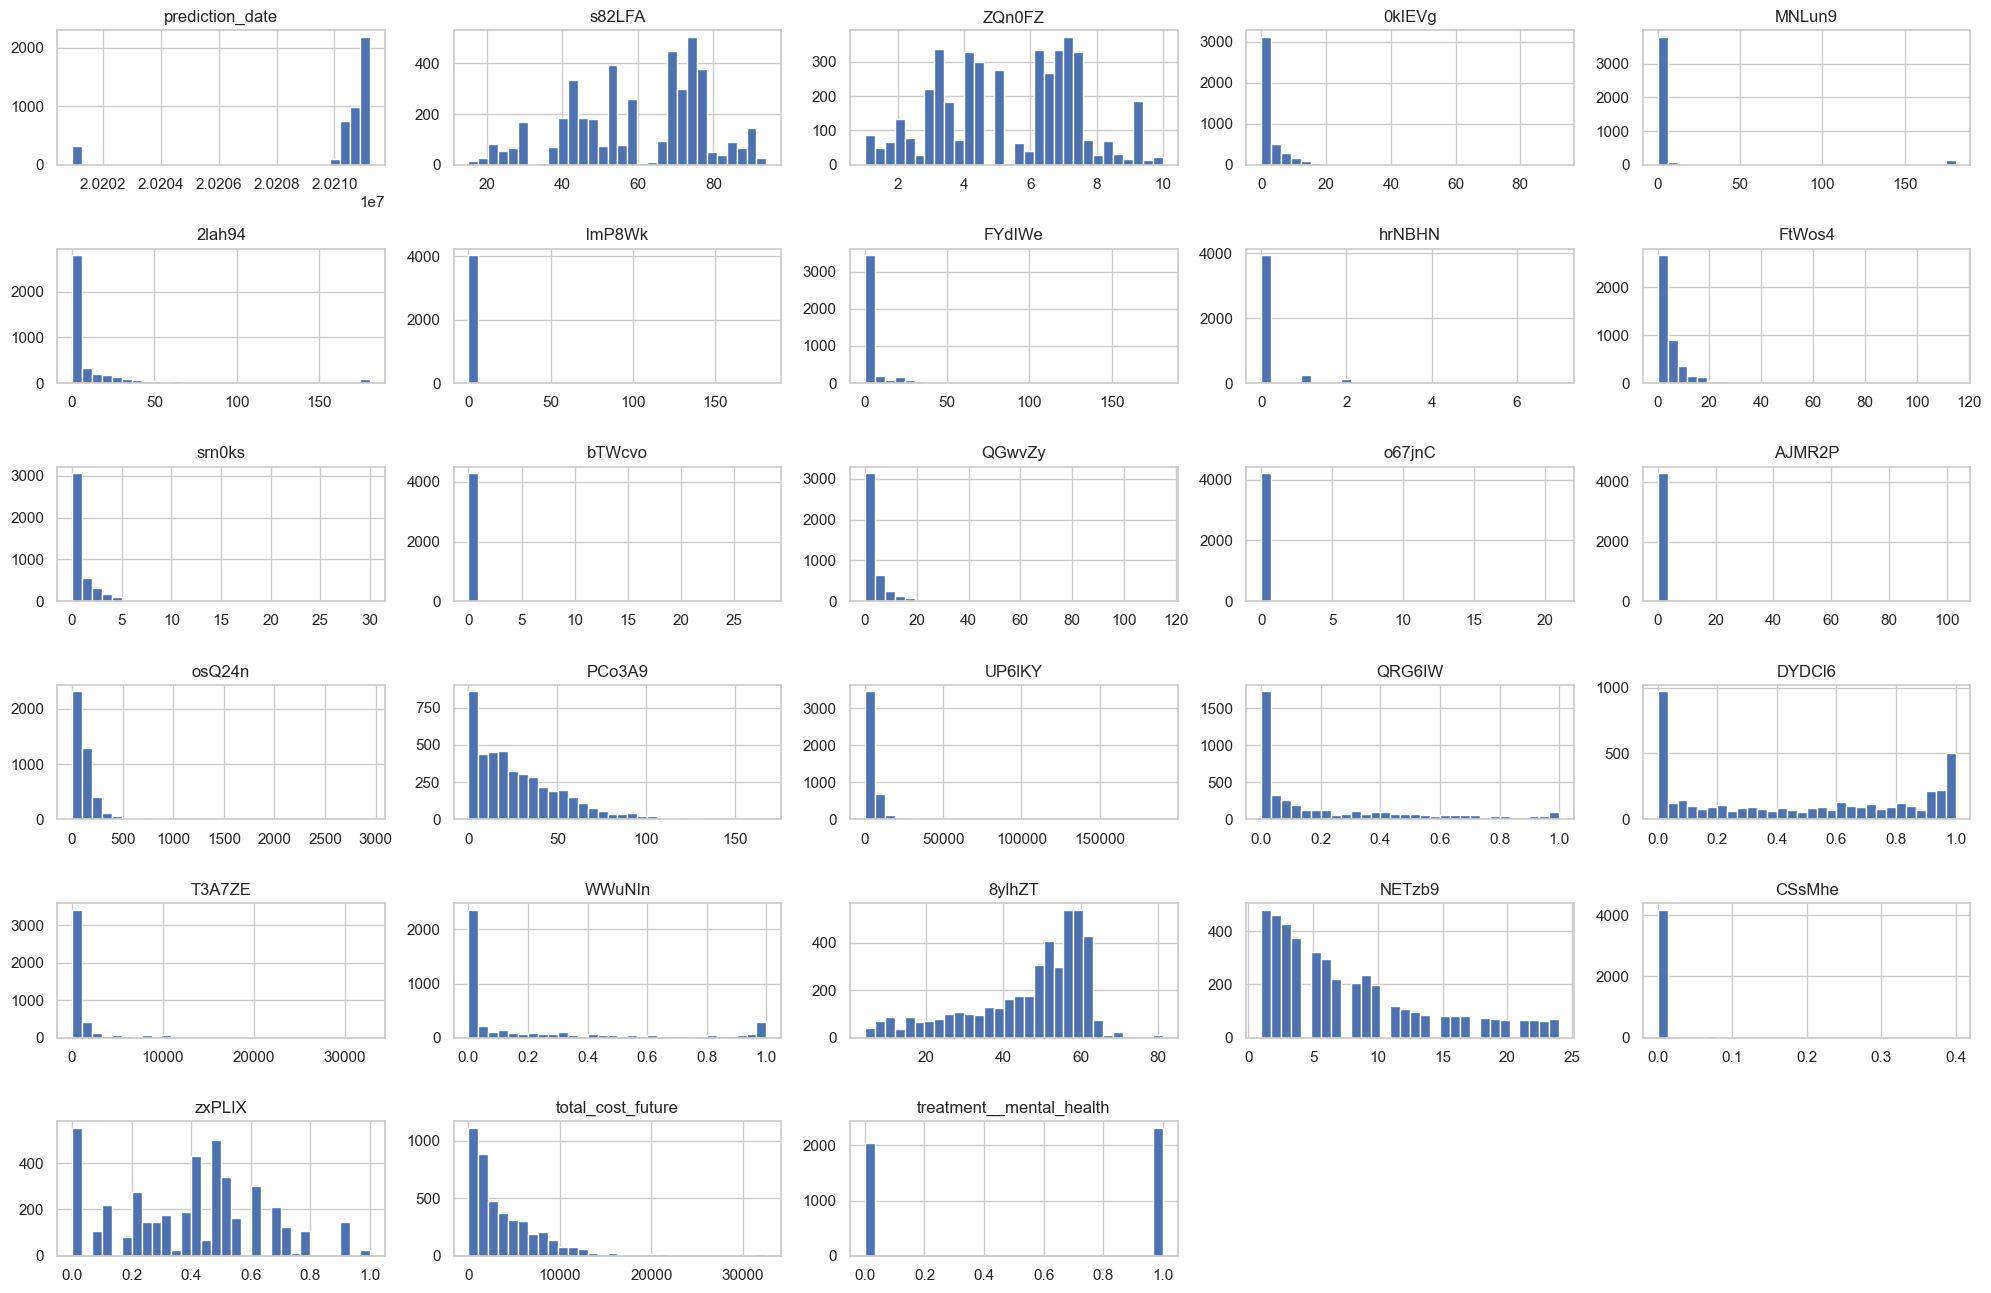

In [3]:
# Histograms are useful for inspecting the distribution of numeric variables.
train_df.hist(bins=30, figsize=(20, 15), layout=(7, 5))
plt.tight_layout()  # Adjust the subplots to fit in the figure area.
plt.title('Histograms of Numerical Features')
plt.show()

#### Boxplots for all numerical features to identify outliers

Boxplots are a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
It can tell you about your outliers and what their values are.

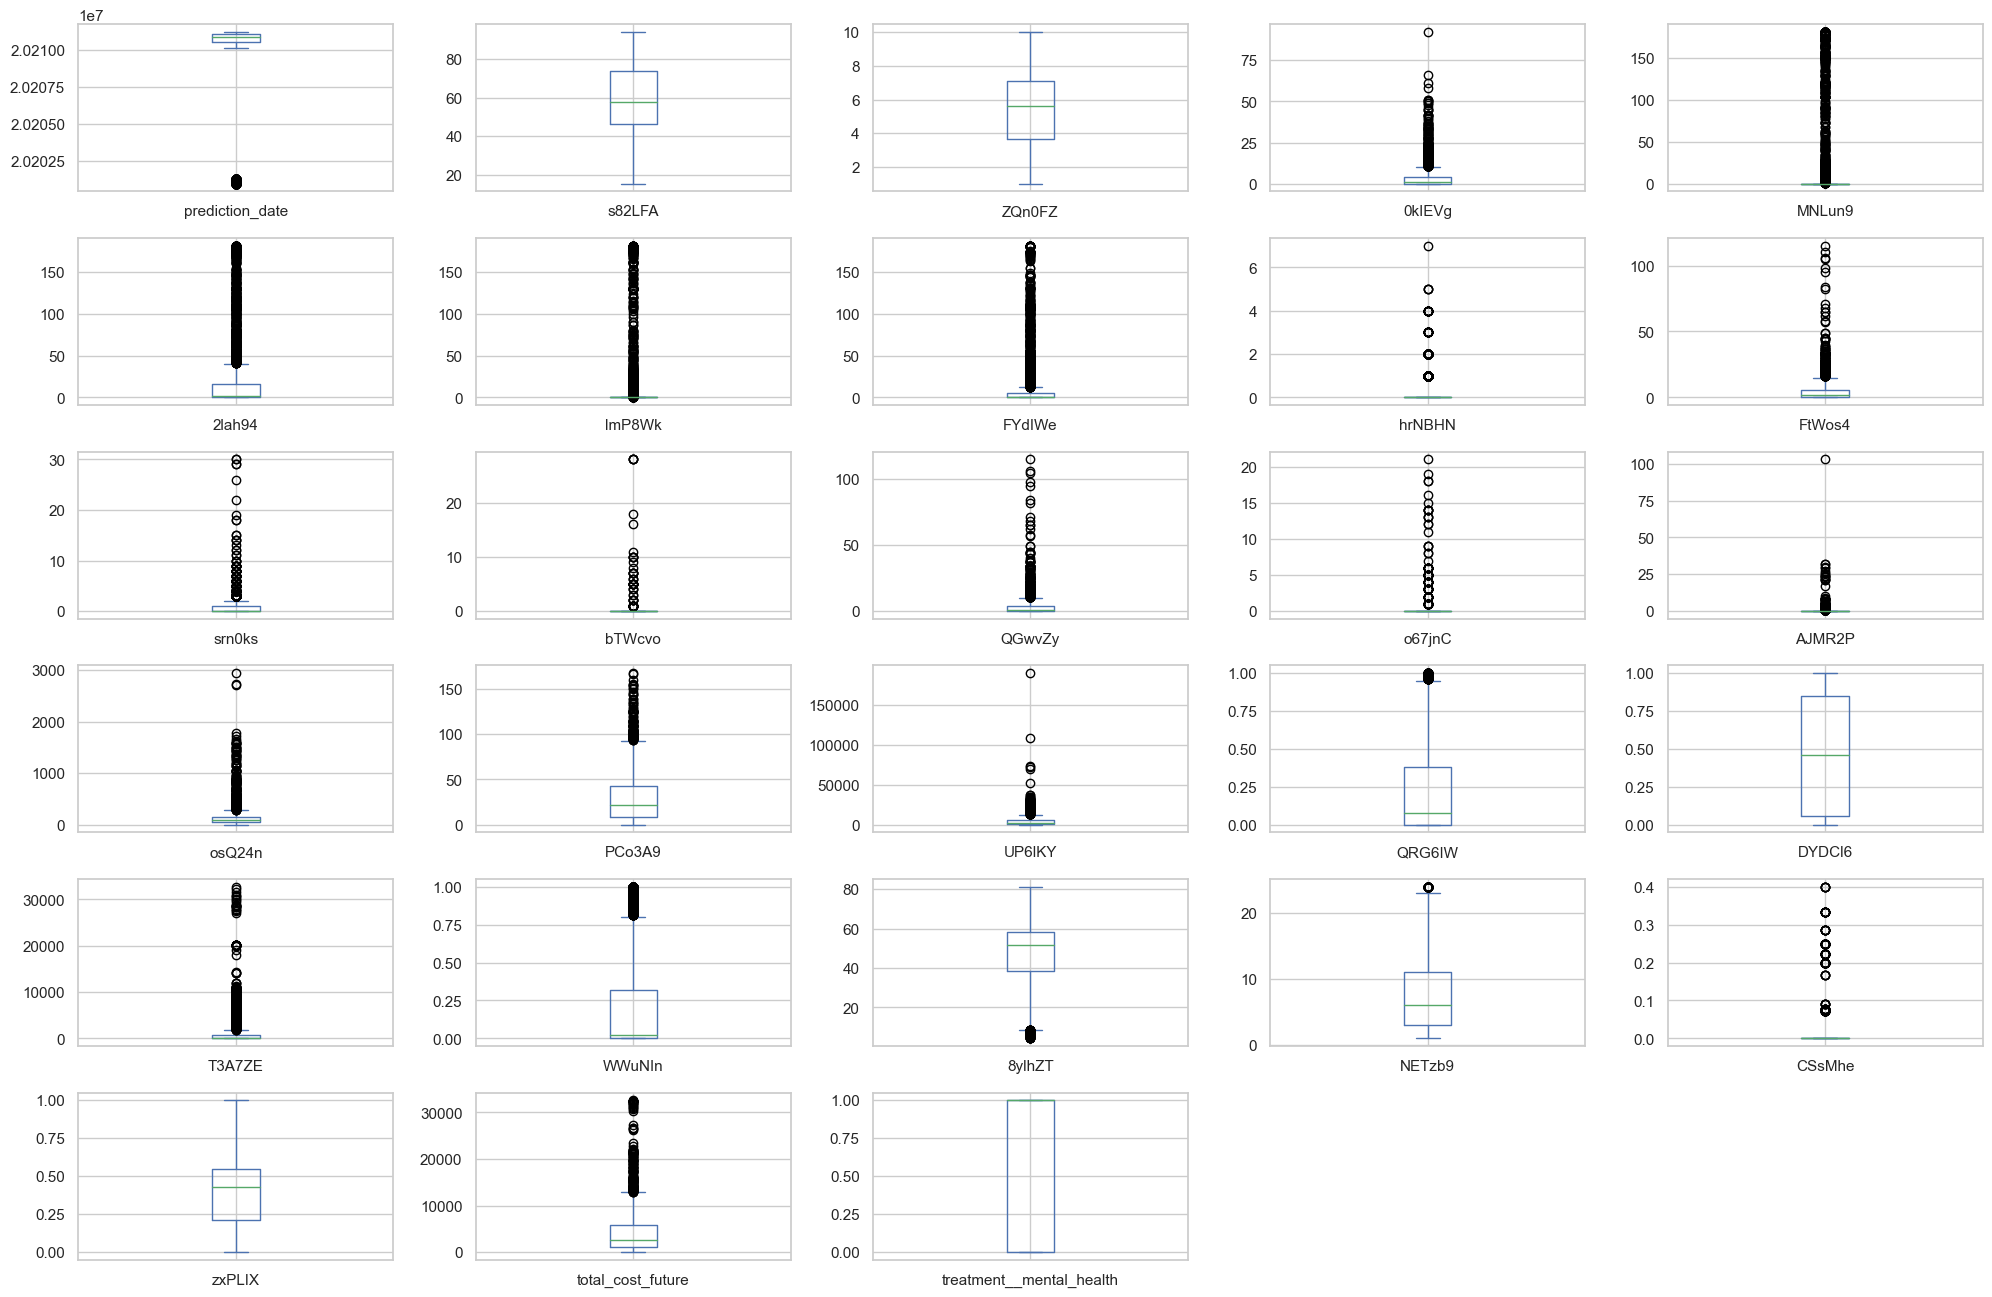

In [4]:
# Boxplots are useful for identifying outliers in numerical variables.
num_features = numeric_cols.tolist()
train_df[num_features].plot(kind='box', subplots=True, layout=(7, 5), figsize=(20, 15))
plt.tight_layout()  # Adjust the subplots to fit in the figure area.
plt.title('Boxplots of Numerical Features')
plt.show()

#### Correlation matrix heatmap only for numeric features

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

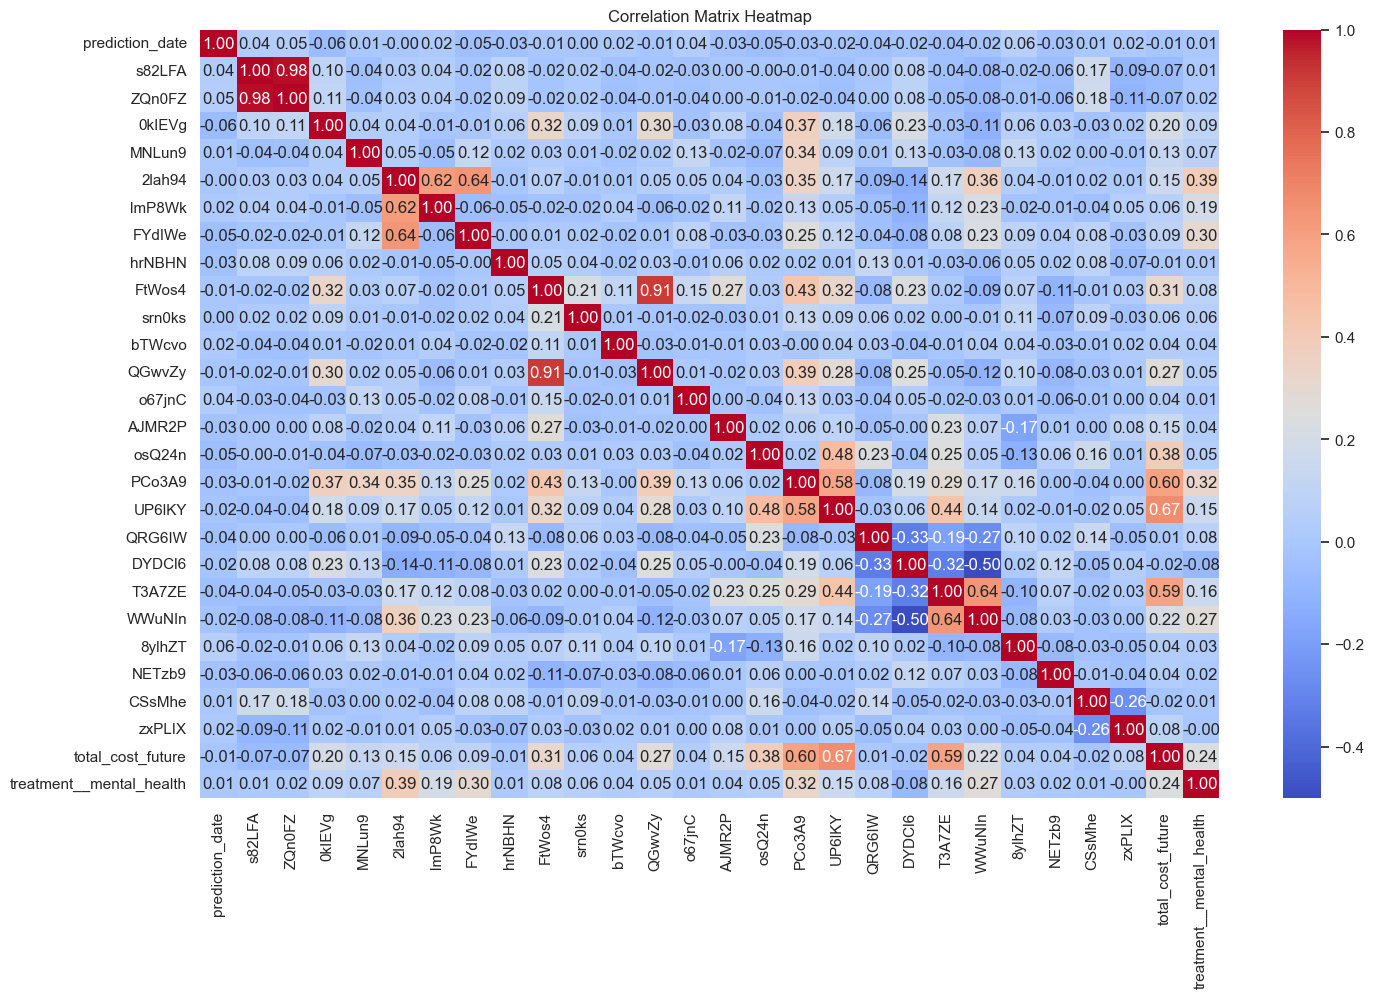

In [5]:
# Correlation matrix heatmap for numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()  # Adjust the layout to fit in the figure area.
plt.title('Correlation Matrix Heatmap')
plt.show()

### Scatter plot of Feature Correlations

In order to gain a clearer understanding of how each feature is correlated with the target variable 'total_future_cost', we visualize the correlation coefficients. The plot below arranges features on the Y-axis and their corresponding correlation coefficients on the X-axis. This visual representation allows us to quickly identify which features have the strongest linear relationships with the target variable.

Features further to the right on the X-axis have a higher positive correlation, while those further to the left have a higher negative correlation. Features closer to the center are less

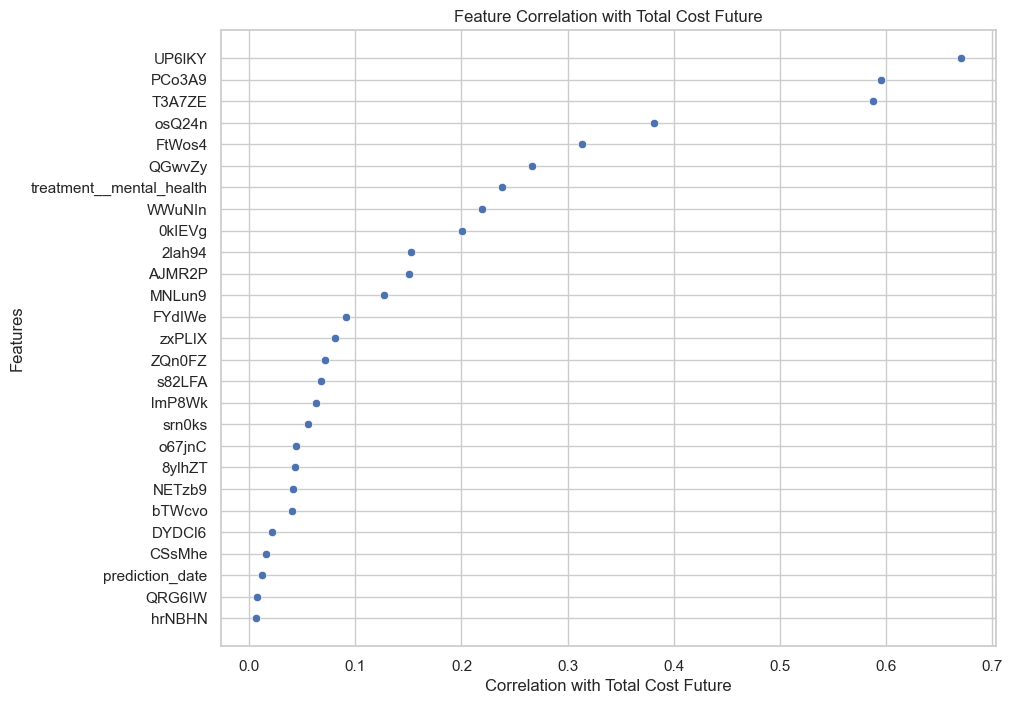

In [6]:
# Plotting feature names against their correlation with 'total_cost_future'
plt.figure(figsize=(10, 8))
sns.scatterplot(x=sorted_corr.values, y=sorted_corr.index)
plt.xlabel('Correlation with Total Cost Future')
plt.ylabel('Features')
plt.title('Feature Correlation with Total Cost Future')
plt.grid(True)
plt.show()

#### Scatter plot for a feature against the regression target 'total_cost_future'

Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation.

Top Correlated Features with "total_cost_future" (above a correlation threshold of 0.5):
UP6lKY    0.670090
PCo3A9    0.595573
T3A7ZE    0.587952
Name: total_cost_future, dtype: float64


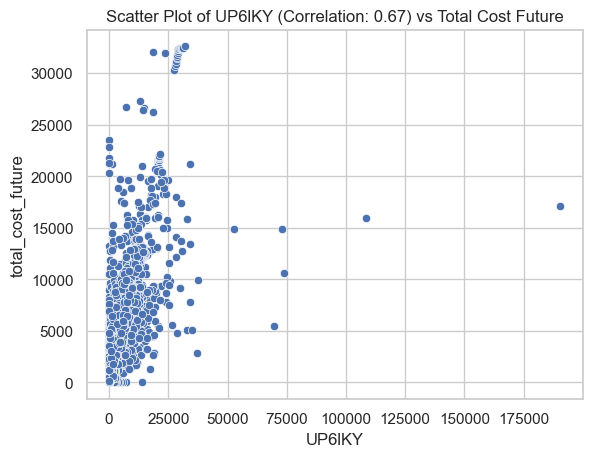

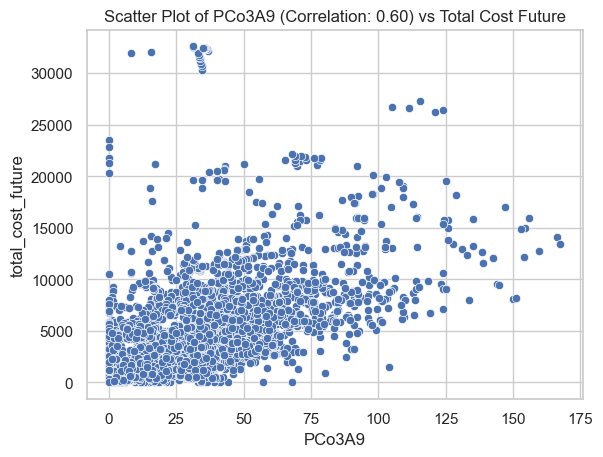

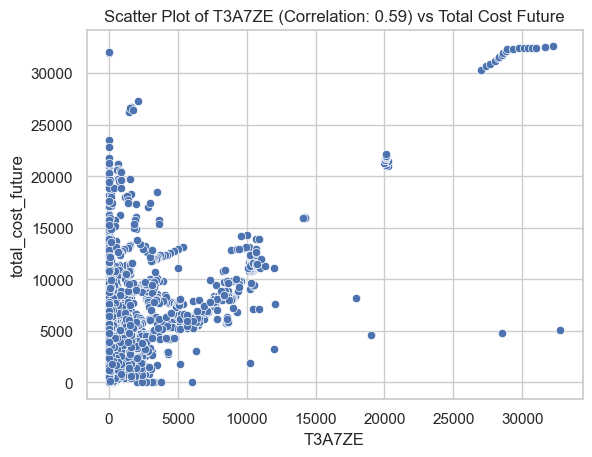

In [7]:
# Print the top correlated features
print(f'Top Correlated Features with "total_cost_future" (above a correlation threshold of {correlation_threshold}):')
print(sorted_highly_corr)

# Visualize scatter plots for features with high correlation with 'total_cost_future'
for feature in sorted_highly_corr.index:
    sns.scatterplot(data=train_df, x=feature, y='total_cost_future')
    plt.title(f'Scatter Plot of {feature} (Correlation: {sorted_highly_corr[feature]:.2f}) vs Total Cost Future')
    plt.show()

#### Count plot for the classification target 'treatment__mental_health'

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
It provides a quick way to visualize the distribution of a categorical variable.

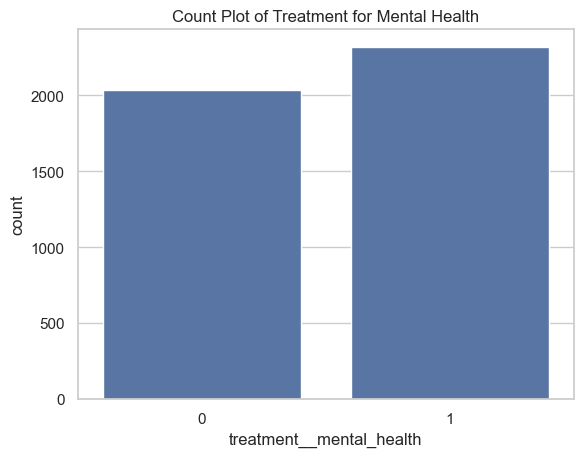

In [8]:
# Count plot for the classification target 'treatment__mental_health'
sns.countplot(data=train_df, x='treatment__mental_health')
plt.title('Count Plot of Treatment for Mental Health')
plt.show()


### Preliminary Conclusions

Our exploratory data analysis (EDA) has revealed several key insights that will significantly influence the subsequent stages of our analysis, particularly in feature selection, engineering, and model development. Here’s a summary of our findings:

1. Patterns and Anomalies:
- I observed a strong correlation between certain features and the target variables (total_cost_future and treatment__mental_health), suggesting these features are likely to be significant predictors in our models.
- Some features demonstrated a non-linear relationship with the target variables, indicating the potential need for polynomial features or non-linear models to capture these dynamics.
- There were notable outliers in several features. While some of these could be genuine extreme values, others may represent data entry errors or anomalies requiring further investigation or preprocessing.
2. Potential Relationships Between Variables:
- Pairwise correlations among several features suggest the existence of multicollinearity. This will need to be addressed either through feature selection or by employing models that can handle correlated inputs.
- Interaction effects between some features and the target variables were observed, suggesting that creating interaction terms or using models that can inherently capture interactions (like decision trees) could improve model performance.
- Temporal patterns were noted in features related to time, indicating that time-based feature engineering might unveil further insights or predictive power.
3. Data Quality and Preprocessing Steps:
- Missing values in certain columns will require imputation. Given the nature of our data, both mean and median imputation strategies will be explored alongside more sophisticated approaches like K-Nearest Neighbors (KNN) imputation.
- The presence of categorical features with a high cardinality calls for careful encoding strategies. We will evaluate the effectiveness of one-hot encoding versus target encoding, especially considering the potential impact on model complexity and overfitting.
- Data scaling and normalization will be necessary for certain models to ensure that features with larger magnitudes do not unduly influence the model outcome. This is particularly pertinent for distance-based models and models sensitive to feature scaling like SVMs and KNN.

These insights form a crucial foundation for our analysis workflow. The next steps will involve rigorous feature engineering to capture the observed relationships and interactions effectively, careful selection of modeling techniques that align with the patterns observed in the data, and thorough preprocessing to address data quality concerns. The ultimate goal is to develop robust predictive models that can accurately forecast total_cost_future and predict treatment__mental_health with high reliability.


### Next Steps

Having completed an extensive exploratory data analysis (EDA), our next phase of the project will involve preparing the data for modeling, developing our predictive models, and evaluating their performance. Here are the detailed steps we will take:

1. Data Cleaning:
- Missing Values: We will implement imputation strategies tailored to the nature of each feature. For numerical features, median imputation might be preferred to handle outliers, whereas for categorical features, mode imputation or predictive modeling (e.g., using K-Nearest Neighbors) could be more suitable.
- Outliers: Outliers will be assessed carefully to determine if they represent valuable extreme cases or data errors. Techniques such as winsorization or robust scaling may be employed to minimize their impact on model performance.
2. Feature Engineering:
- Based on insights from the EDA, we will create interaction terms and polynomial features to capture non-linear relationships. Time-based features will also be explored to leverage any identified temporal patterns.
3. Feature Selection:
- To address multicollinearity and reduce model complexity, feature selection techniques such as Recursive Feature Elimination (RFE) or model-based selection methods (e.g., using feature importance from a preliminary RandomForest model) will be used to retain only the most informative features.
4. Data Splitting:
- The dataset will be divided into training and validation sets to ensure that our models are evaluated on unseen data. This split will also facilitate the tuning of hyperparameters and the assessment of model generalizability.
5. Model Development and Validation:
- For the regression model aimed at predicting total_cost_future, we will start with a RandomForestRegressor due to its flexibility and robustness in handling complex data relationships.
- The binary classification model for predicting treatment__mental_health will also employ a RandomForestClassifier initially, given its efficacy in classification tasks with imbalanced data.
- Both models will be validated using cross-validation techniques to assess their performance and stability across different subsets of the data.
6. Hyperparameter Tuning:
- We will use grid search and random search strategies to explore the hyperparameter space of our models efficiently. The goal is to find the optimal configuration that maximizes model performance on the validation set.
7. Prediction and Evaluation on Test Dataset:
- Finally, the trained and tuned models will be used to generate predictions on the test dataset. The focus will be on evaluating the models' ability to generalize to new data, using appropriate metrics such as RMSE (Root Mean Squared Error) for the regression model and accuracy, precision, recall, and AUC-ROC for the classification model.

These steps are designed to build upon the foundations laid during the EDA, with the aim of developing predictive models that are both accurate and robust. Throughout this process, we will maintain a focus on model interpretability and the practical applicability of our findings.
